# Prepare Dataset
This notebook documents how we import and orgaznize the dataset from [IMGUR5K Handwriting Dataset Repository](https://github.com/facebookresearch/IMGUR5K-Handwriting-Dataset) 

## Step 1. Collect Dataset

### 1.1 Get Dataset
1. Follow the instruction from [IMGUR5K Handwriting Dataset Repository](https://github.com/facebookresearch/IMGUR5K-Handwriting-Dataset) to collect the dataset.

2. Save to local directory

### 1.2 Import Dataset

In [1]:
import os

# Change directory to the directory with dataset
os.chdir('/common/users/sk2779')

# Confirm it's changed
print("Current directory:", os.getcwd())

Current directory: /common/users/sk2779


In [2]:
# your path to image dataset
image_dataset_path = './dataset'

In [3]:
import os
import pandas as pd

def create_image_df():
    assert image_dataset_path is not None, "Set image dataset to the folder that include IMGUR5K Handwriting Dataset "
    # List to hold file names (without extensions)
    ids = []

    # Iterate over all files in the directory
    for filename in os.listdir(image_dataset_path):
        # Get the full path of the file
        full_path = os.path.join(image_dataset_path, filename)

        # Skip directories, only process files
        if os.path.isfile(full_path):
            # Split the filename into name and extension
            name, _ = os.path.splitext(filename)

            # Add the file name (without extension) to the list
            ids.append(name)

    # Create a DataFrame with two columns: ids and url
    df = pd.DataFrame({
        "id": ids
    })

    return df


# call function
df = create_image_df()

In [4]:
# overview of df
df.head()

,id
0,ONWVZrH
1,dRrGT11
2,5FD2oGX
3,SGND0Om
4,qWG1DMX


### 1.3 Show image

In [12]:
from PIL import Image

def read_image(path):
  image = Image.open(path).convert("RGB")
  return image

In [14]:
import matplotlib.pyplot as plt

def show_image(index):
    assert image_dataset_path is not None, "Set image dataset to the folder that include IMGUR5K Handwriting Dataset "
    path = image_dataset_path+"/"+ str(index) + '.jpg'
    img = Image.open(path).convert("RGB")
    # Display the image in a smaller size
    plt.figure(figsize=(10, 6))  # Adjust width and height in inches
    plt.imshow(img)
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()

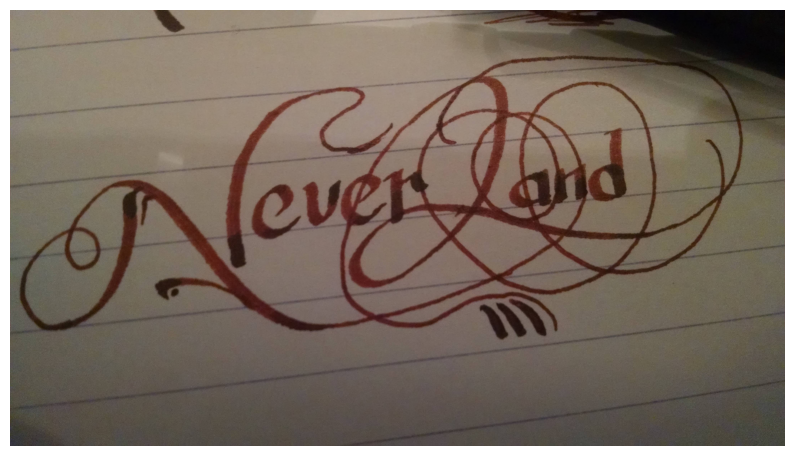

In [15]:
show_image("ONWVZrH")

## Step 2. Add Ground Truth Text

### 2.1 Extract from IMGUR5K annotation

In [9]:
import csv
# Get data infomation from the lst
data_info = './dataset/imgur5k_data.lst'

# Read url: actual url of the image
# Location: the location of the text based on the image
# text: Ground Truth Text
df_info = pd.read_csv(data_info, sep='\t', header=None, names=['url', 'location', 'text'], quoting=csv.QUOTE_NONE, )

# Extract the 'id' from the URL
df_info['id'] = df_info['url'].apply(lambda x: x.split('/')[-1].split('.')[0])

# Reorder columns to match the desired output
df_info = df_info[['id', 'url', 'location', 'text']]

### 2.2 Add into Main Dataset

In [10]:
df = pd.merge(df, df_info, on='id', how='left')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227083 entries, 0 to 227082
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        227083 non-null  object
 1   url       227075 non-null  object
 2   location  227075 non-null  object
 3   text      227055 non-null  object
dtypes: object(4)
memory usage: 6.9+ MB


In [23]:
df['text'] = df['text'].astype('string')

### 2.3 Test if result match

In [17]:
df.iloc[0]

id                                        ONWVZrH
url               https://i.imgur.com/ONWVZrH.jpg
location    [2071.0, 1086.5, 4219.0, 1707.5, 3.0]
text                                    NeverLand
Name: 0, dtype: object

"Neverland" matches the images. Merge are correct

## Step 3. Data Cleaning

### 3.1 Varify Speical Characters

##### Speical characters
Check if the special characters are being processed corrected

In [18]:
import pandas as pd

# Patter for all Special characters
special_char_pattern = r'[^a-zA-Z0-9\s]'  # Matches anything not alphanumeric or whitespace

# Select rows with special characters
special_char_rows = df[df['text'].str.contains(special_char_pattern, regex=True, na=False)]

In [19]:
special_char_rows.head()

,id,url,location,text
1,ONWVZrH,https://i.imgur.com/ONWVZrH.jpg,"[872.0, 94.0, 320.0, 190.0, 1.0]",.
7,dRrGT11,https://i.imgur.com/dRrGT11.jpg,"[1646.0, 580.67, 767.0, 263.67, 4.33]",graphology!
14,dRrGT11,https://i.imgur.com/dRrGT11.jpg,"[1243.0, 918.67, 517.0, 150.0, 1.67]","intrigued,"
22,dRrGT11,https://i.imgur.com/dRrGT11.jpg,"[1183.33, 1024.0, 486.0, 160.67, 5.0]",thoughts!
23,dRrGT11,https://i.imgur.com/dRrGT11.jpg,"[1570.0, 996.0, 233.0, 147.67, 4.67]",I've


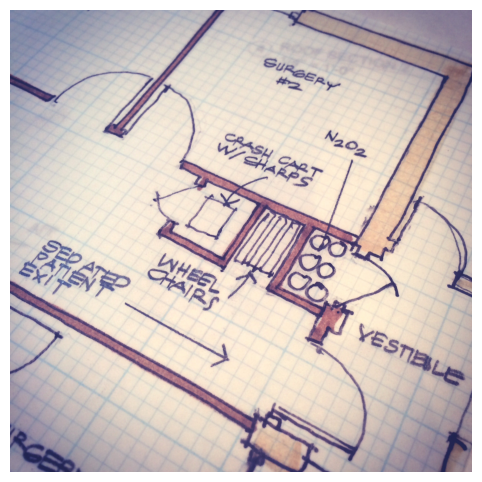

In [20]:
show_image("A3b6IRB")

The special charcters are being processed correctly. Confirm more cases.

In [21]:
# Math Symbols

In [24]:
# Define the pattern of allowed characters:
# - \w for word characters (letters, numbers, underscore)
# - \s for whitespace
# - Specific punctuation, math symbols, and escape characters
# - Double backslash (\\) represents a single backslash
allowed_pattern = r'^[\w\s\.,!?;:\-+*/=()\[\]{}<>@#\$%^&_\'"\t\n]+$'
mask = ~df['text'].str.contains(allowed_pattern, regex=True)
non_standard_rows = df[mask]

In [25]:
non_standard_rows.head()

,id,url,location,text
189,5FD2oGX,https://i.imgur.com/5FD2oGX.jpg,"[1528.33, 3747.67, 1795.33, 573.67, -0.67]",face~
689,i4Cl3nG,https://i.imgur.com/i4Cl3nG.jpg,"[680.0, 57.5, 342.0, 116.0, -0.5]",•Watch
690,i4Cl3nG,https://i.imgur.com/i4Cl3nG.jpg,"[804.0, 245.0, 377.0, 164.5, -1.0]",•Ground
691,i4Cl3nG,https://i.imgur.com/i4Cl3nG.jpg,"[845.5, 429.5, 446.0, 159.5, 0.5]",•Shorter
692,i4Cl3nG,https://i.imgur.com/i4Cl3nG.jpg,"[630.0, 838.0, 241.5, 166.0, -0.5]",•If


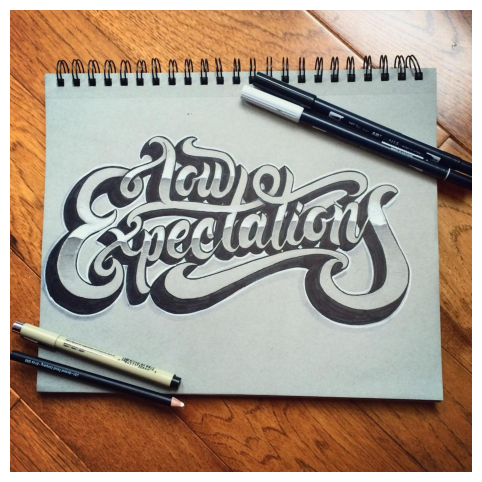

In [26]:
show_image("sNpIWnz")

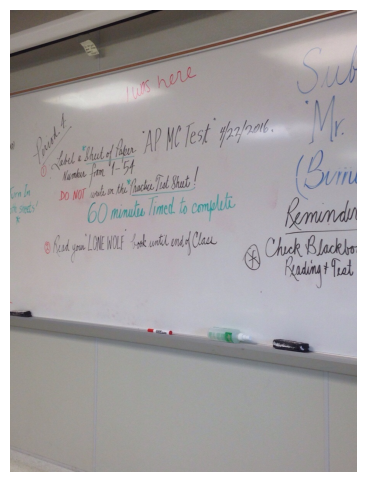

In [27]:
show_image("hhk8nvy")

The text that contain "\\/" seems to be just "/", check more to confirm. 

In [28]:
mask = df['text'].str.contains(r'\\', regex=True)
check_rows= df[mask]

In [29]:
check_rows.head()

,id,url,location,text
1138,PEkRhfG,https://i.imgur.com/PEkRhfG.jpg,"[1055.0, 1431.0, 191.0, 88.0, 0.0]",335\/365
12743,k7OWalj,https://i.imgur.com/k7OWalj.jpg,"[1408.0, 477.0, 309.0, 63.0, 0.0]",-VEG\/POT
12745,k7OWalj,https://i.imgur.com/k7OWalj.jpg,"[773.0, 475.0, 347.0, 55.0, -1.0]",-SOUP\/SAL
12784,k7OWalj,https://i.imgur.com/k7OWalj.jpg,"[1449.0, 1672.0, 225.0, 168.0, -4.0]",\/\/:
12824,dUzdIrC,https://i.imgur.com/dUzdIrC.jpg,"[180.0, 55.0, 230.0, 43.0, -1.0]",\/u\/helloxkimmi


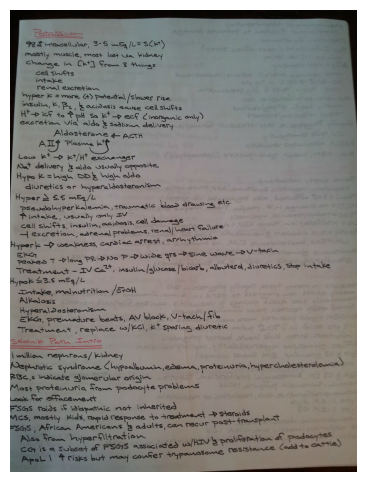

In [30]:
show_image("QikXzEi")

It appears that the text that contain "\\\/" seems to be just "/", replace them

In [31]:
df['text'] = df['text'].str.replace('\\/', '/', regex=False)

In [32]:
df[df['text'].str.contains(r'/', regex=True)].head()

,id,url,location,text
376,A03IK0H,https://i.imgur.com/A03IK0H.jpg,"[2108.5, 287.0, 964.0, 270.5, 1.5]",7/28/19
423,IxGpguD,https://i.imgur.com/IxGpguD.jpg,"[337.0, 195.5, 95.5, 92.5, 0.5]",O/H
554,fZ4OvI4,https://i.imgur.com/fZ4OvI4.jpg,"[321.67, 275.0, 274.33, 77.0, -1.0]","/r/handwriting,"
578,fZ4OvI4,https://i.imgur.com/fZ4OvI4.jpg,"[547.33, 631.33, 226.67, 83.33, -0.33]",/u/Fargraven
741,MB14zD8,https://i.imgur.com/MB14zD8.jpg,"[846.5, 2081.0, 146.5, 191.0, 4.5]",w/


In [33]:
mask = ~df['text'].str.contains(allowed_pattern, regex=True)
non_standard_rows2 = df[mask]

In [34]:
print("Words with special character:", len(non_standard_rows2), ", Percentage: ", len(non_standard_rows2)/len(df))
print("Images with special charatcer:", len(non_standard_rows2['id'].unique()), ", Percentage: ", len(non_standard_rows2['id'].unique())/len(df['id'].unique()))

Words with special character: 2004 , Percentage:  0.008824967082520488
Images with special charatcer: 565 , Percentage:  0.0706956956956957


Since there aren't too many images that contain uncommon special characters, we would remove these images that contains uncommon special characters to ensure the ground-truth text are correct and limited vocabulary.

In [35]:
df=df[~mask]

In [36]:
print("total number of words", len(df))
print("total number of images", len(df['id'].unique()))

total number of words 225051
total number of images 7977


In [37]:
# confirm there is no special characters
count_matching = df['text'].str.contains(allowed_pattern, regex=True, na=False).sum()
print(f"Number of rows with allowed characters: {count_matching}")

Number of rows with allowed characters: 225051


### 2.2 All-symbols text
There might be some error if a word only contains symbols

In [38]:
pattern = r'^[^a-zA-Z0-9]+$'  # Matches strings with no alphanumeric chars at all
non_alnum_rows = df[df['text'].str.contains(pattern, regex=True, na=False)]

In [39]:
non_alnum_rows.head(20)

,id,url,location,text
1,ONWVZrH,https://i.imgur.com/ONWVZrH.jpg,"[872.0, 94.0, 320.0, 190.0, 1.0]",.
163,dRrGT11,https://i.imgur.com/dRrGT11.jpg,"[713.5, 3438.0, 361.0, 40.0, 179.0]",.
164,dRrGT11,https://i.imgur.com/dRrGT11.jpg,"[2270.0, 3545.0, 356.0, 51.0, 178.0]",.
165,dRrGT11,https://i.imgur.com/dRrGT11.jpg,"[1493.0, 229.0, 180.0, 36.0, -177.0]",.
166,dRrGT11,https://i.imgur.com/dRrGT11.jpg,"[1490.5, 237.5, 199.0, 59.5, 0.5]",.
168,dRrGT11,https://i.imgur.com/dRrGT11.jpg,"[716.0, 948.0, 537.5, 177.5, 5.0]",.
169,dRrGT11,https://i.imgur.com/dRrGT11.jpg,"[1618.5, 1722.0, 545.0, 136.5, 1.5]",.
172,dRrGT11,https://i.imgur.com/dRrGT11.jpg,"[2310.0, 3547.0, 434.0, 75.0, 0.0]",.
173,dRrGT11,https://i.imgur.com/dRrGT11.jpg,"[2486.0, 3555.0, 81.0, 56.0, -180.0]",.
174,dRrGT11,https://i.imgur.com/dRrGT11.jpg,"[691.0, 3434.0, 477.0, 80.0, -1.0]",.


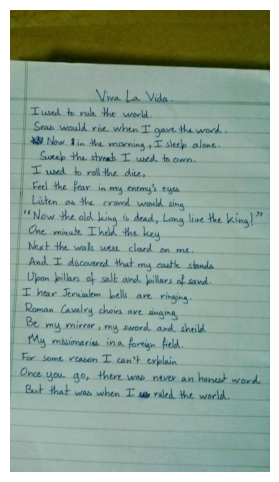

In [40]:
show_image("5xiSlCK")

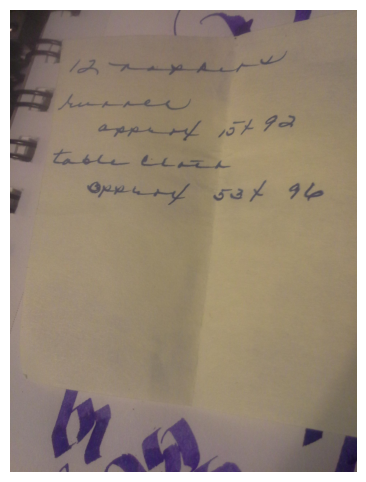

In [41]:
show_image("tMQDhwl")

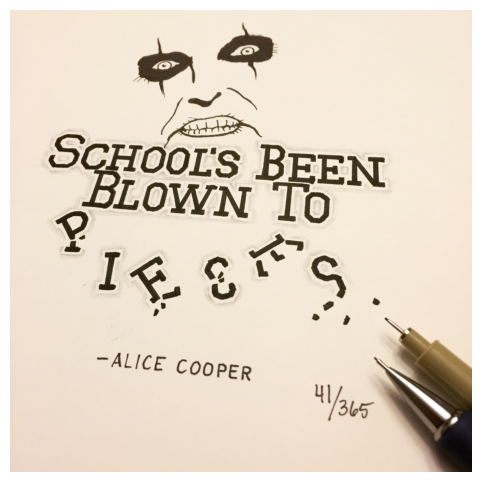

In [42]:
show_image("IvfnYNp")

There appear to be some inital fault in labels, all the ones that contains only one period seem to be incorrect. Remove them all

In [43]:
only_period_rows= df[df['text'] == '.']

In [44]:
print("Words with only one period:", len(only_period_rows), ", Percentage: ", len(only_period_rows)/len(df))
print("Images with special charatcer:", len(only_period_rows['id'].unique()), ", Percentage: ", len(only_period_rows['id'].unique())/len(df['id'].unique()))

Words with only one period: 19567 , Percentage:  0.08694473697073107
Images with special charatcer: 3762 , Percentage:  0.4716058668672433


In [45]:
df = df[df['text'] != '.']

In [46]:
# check other rows that have ony characters
pattern = r'^[^a-zA-Z0-9]+$'  # Matches strings with no alphanumeric chars at all
non_alnum_rows2 = df[df['text'].str.contains(pattern, regex=True, na=False)]

In [47]:
non_alnum_rows2.head()

,id,url,location,text
695,RGIW5,https://i.imgur.com/RGIW5.jpg,"[1144.0, 1103.5, 260.0, 508.5, -89.0]",:)
743,MB14zD8,https://i.imgur.com/MB14zD8.jpg,"[1329.0, 2079.0, 77.5, 172.5, 9.0]",&
1017,65y6hrw,https://i.imgur.com/65y6hrw.jpg,"[741.0, 272.0, 100.0, 142.0, -60.0]",#
2029,GB1Qy6L,https://i.imgur.com/GB1Qy6L.jpg,"[1031.5, 733.5, 467.5, 253.5, 4.5]",&
3348,FNP6xPX,https://i.imgur.com/FNP6xPX.jpg,"[418.0, 435.67, 54.67, 71.0, -3.67]",&


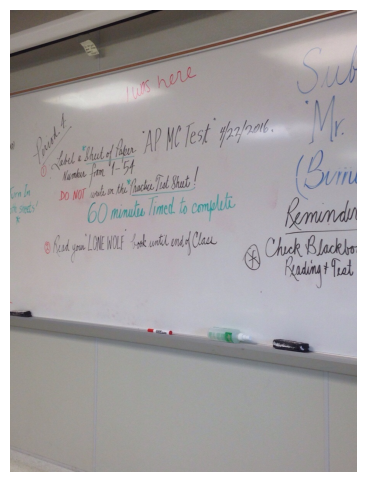

In [48]:
show_image("hhk8nvy")

### 3.5 Save Cleaned Dataset

In [53]:
df.to_csv('df_cleaned_info.csv')